# ASSIGNMENT 4

In [59]:
library('ISLR')
library('tree')
library('randomForest')
library('gbm')
library('glmnet')

## QUESTION 8

#### In the lab, a classification tree was applied to the Carseats data set after converting Sales into a qualitative response variable. Now we will seek to predict Sales using regression trees and related approaches,treating the response as a quantitative variable.

#### (a) Split the data set into a training set and a test set.

In [102]:
set.seed(1)
car_train <- sample(1:nrow(Carseats), nrow(Carseats) * 0.8)
Carseats.train <- Carseats[car_train, ]
Carseats.test <- Carseats[-car_train, ]

#### (b) Fit a regression tree to the training set. Plot the tree, and interpret the results. What test MSE do you obtain?

In [106]:
tree.c_seats <- tree(Sales ~ ., data = Carseats.train)
summary(tree.c_seats)


Regression tree:
tree(formula = Sales ~ ., data = Carseats.train)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Age"         "Income"      "CompPrice"  
[6] "Advertising"
Number of terminal nodes:  16 
Residual mean deviance:  2.572 = 781.9 / 304 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-4.45400 -1.07000 -0.05544  0.00000  1.14500  4.69600 

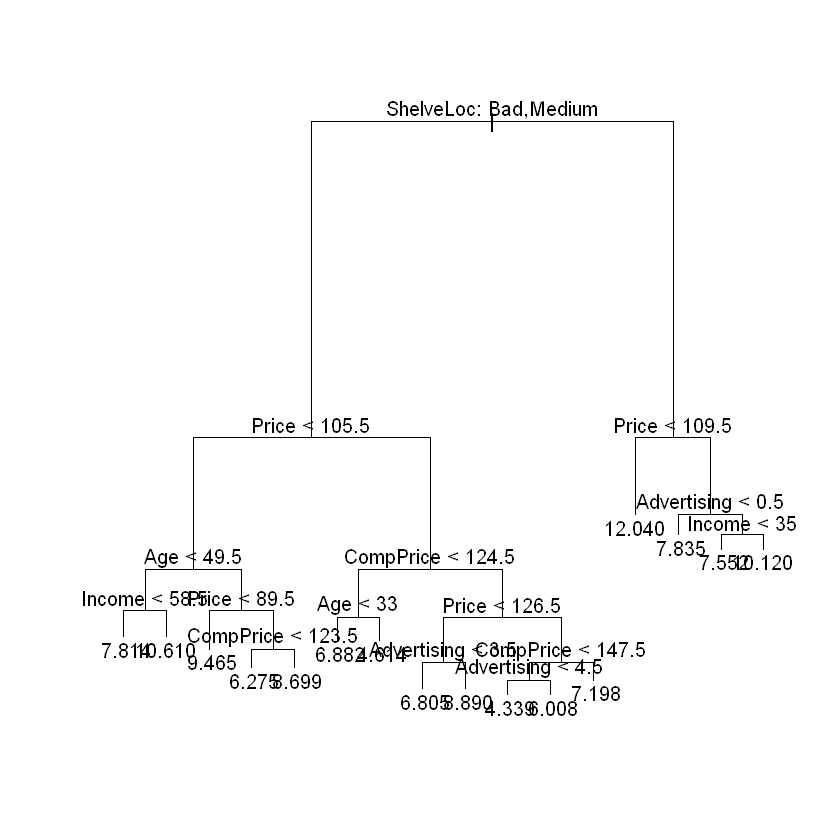

In [111]:
plot(tree.c_seats)
text(tree.c_seats, pretty = 0)

In [198]:
pred_test <- predict(tree.c_seats, newdata = Carseats.test)
mean((pred_test - Carseats.test$Sales)^2)

[1] 4.936081

#### (c) Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test MSE?

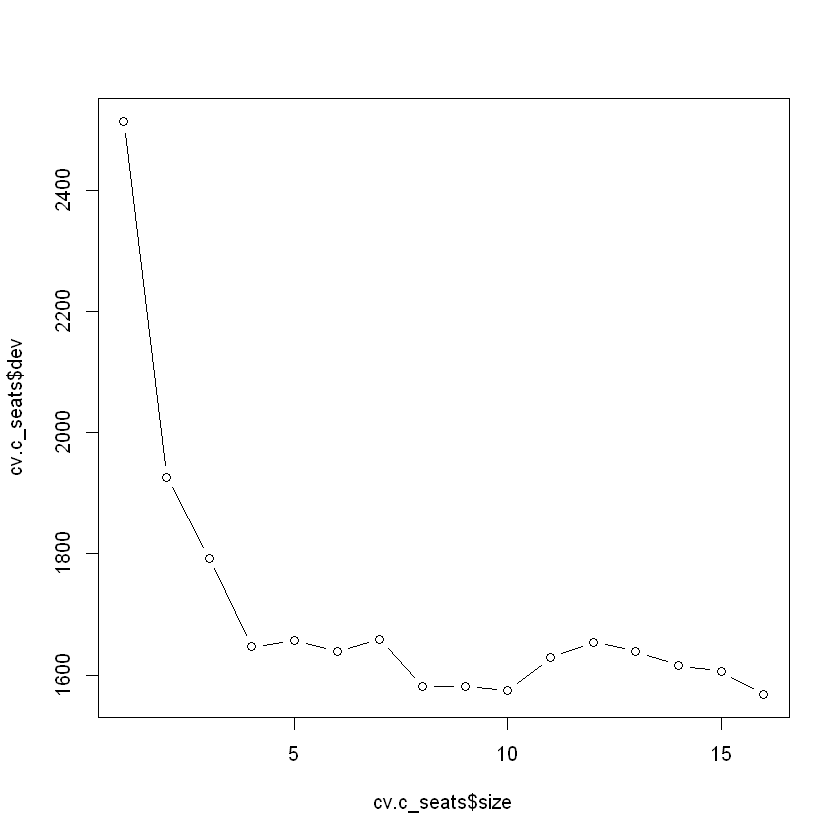

In [212]:
cv.c_seats <- cv.tree(tree.c_seats)
plot(cv.c_seats$size, cv.c_seats$dev, type = "b")

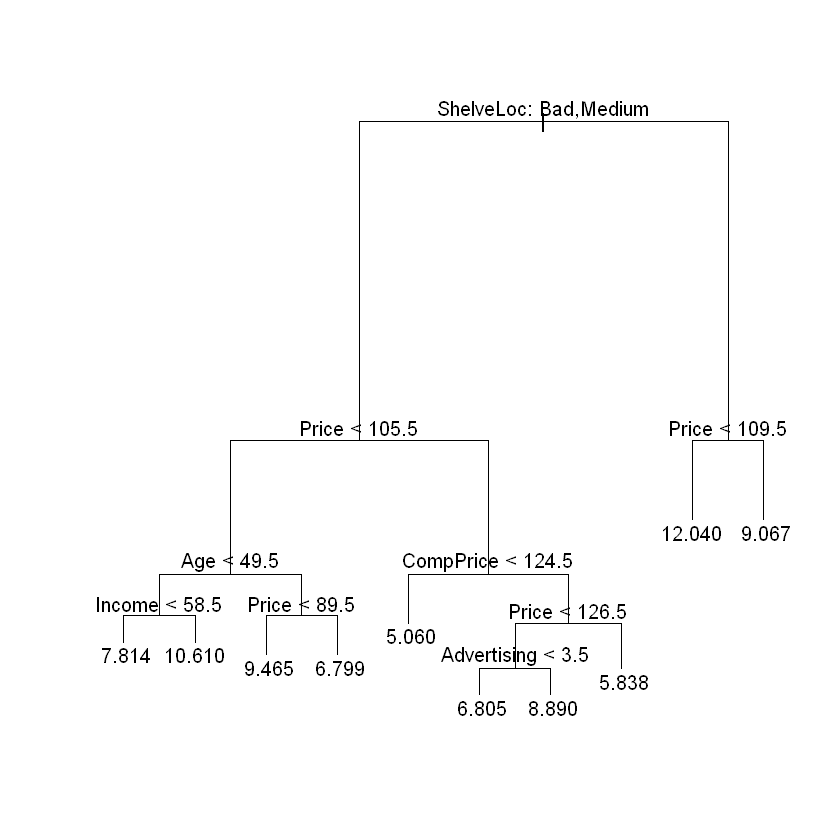

In [213]:
prune.carseats <- prune.tree(tree.carseats, best = 10)
plot(prune.carseats)
text(prune.carseats, pretty = 0)

In [214]:
yhat <- predict(prune.carseats, newdata = Carseats.test)
mean((yhat - Carseats.test$Sales)^2)

[1] 5.088731

ANSWER: From the plot we can see that optimal value of size is 10 for this model and when we prune the our existing model our test mse is increasing so we can not say it is good to prune our model in this case

#### (d) Use the bagging approach in order to analyze this data. What test MSE do you obtain? Use the function to de importance() termine which variables are most important.

In [215]:
bag.carseats <- randomForest(Sales ~ ., data = Carseats.train, mtry = 10, ntree = 500, importance = TRUE)
yhat.bag <- predict(bag.carseats, newdata = Carseats.test)
mean((yhat.bag - Carseats.test$Sales)^2)

[1] 2.961416

In [216]:
importance(bag.carseats)

,%IncMSE,IncNodePurity
CompPrice,35.89876072,255.35698
Income,10.93997617,141.09814
Advertising,23.41646109,191.07992
Population,-0.05314417,77.00455
Price,76.69133271,728.31903
ShelveLoc,78.62259886,699.56435
Age,23.80713736,240.37336
Education,2.69853387,61.26914
Urban,-1.37615261,10.63079
US,2.85411255,10.71038


#### (e) Use random forests to analyze this data. What test MSE do you obtain? Use the importance() function to determine which variables are most important. Describe the effect of m, the number of variables considered at each split, on the error rate obtained.

In [217]:
rf.carseats <- randomForest(Sales ~ ., data = Carseats.train, mtry = 4, ntree = 500, importance = TRUE)
pred.rf <- predict(rf.carseats, newdata = Carseats.test)
mean((pred.rf - Carseats.test$Sales)^2)

[1] 3.127552

ANSWER: When m increase our mse is decreasing.

In [218]:
importance(rf.carseats)

,%IncMSE,IncNodePurity
CompPrice,22.7954680,232.05735
Income,7.1438599,167.70466
Advertising,19.0280936,192.70658
Population,-1.6284895,117.08509
Price,56.9007124,652.05293
ShelveLoc,59.3074669,606.91179
Age,19.5844869,266.53555
Education,1.5607459,88.14324
Urban,-0.8384075,17.17074
US,4.8817431,27.19996


## QUESTION 9

#### This problem involves the OJ data set which is part of the ISLR package.

#### (a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [164]:
set.seed(1)
oj_train <- sample(1:nrow(OJ), 800)
OJ.train <- OJ[oj_train, ]
OJ.test <- OJ[-oj_train, ]

#### (b) Fit a tree to the training data, with Purchase as the response and the other variables as predictors. Use the summary() function to produce summary statistics about the tree, and describe the results obtained. What is the training error rate? How many terminal nodes does the tree have?

In [165]:
tree.oj <- tree(Purchase ~ ., data = OJ.train)
summary(tree.oj)


Classification tree:
tree(formula = Purchase ~ ., data = OJ.train)
Variables actually used in tree construction:
[1] "LoyalCH"       "PriceDiff"     "SpecialCH"     "ListPriceDiff"
[5] "PctDiscMM"    
Number of terminal nodes:  9 
Residual mean deviance:  0.7432 = 587.8 / 791 
Misclassification error rate: 0.1588 = 127 / 800 

ANSWER: 9 Terminal nodes and a training error rate of 0.1588.

#### (c) Type in the name of the tree object in order to get a detailed text output. Pick one of the terminal nodes, and interpret the information displayed.

In [166]:
tree.oj

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1073.00 CH ( 0.60625 0.39375 )  
   2) LoyalCH < 0.5036 365  441.60 MM ( 0.29315 0.70685 )  
     4) LoyalCH < 0.280875 177  140.50 MM ( 0.13559 0.86441 )  
       8) LoyalCH < 0.0356415 59   10.14 MM ( 0.01695 0.98305 ) *
       9) LoyalCH > 0.0356415 118  116.40 MM ( 0.19492 0.80508 ) *
     5) LoyalCH > 0.280875 188  258.00 MM ( 0.44149 0.55851 )  
      10) PriceDiff < 0.05 79   84.79 MM ( 0.22785 0.77215 )  
        20) SpecialCH < 0.5 64   51.98 MM ( 0.14062 0.85938 ) *
        21) SpecialCH > 0.5 15   20.19 CH ( 0.60000 0.40000 ) *
      11) PriceDiff > 0.05 109  147.00 CH ( 0.59633 0.40367 ) *
   3) LoyalCH > 0.5036 435  337.90 CH ( 0.86897 0.13103 )  
     6) LoyalCH < 0.764572 174  201.00 CH ( 0.73563 0.26437 )  
      12) ListPriceDiff < 0.235 72   99.81 MM ( 0.50000 0.50000 )  
        24) PctDiscMM < 0.196197 55   73.14 CH ( 0.61818 0.38182 ) *
        25) PctDiscMM > 0.196197 17   12.32 M

ANSWER: I pick the node labelled 20, which is a terminal node because of the asterisk. The split criterion is SpecialCH < 0.5, the number of observations in that branch is 64 with a deviance of 51.98 and an overall prediction for the branch of MM. Less than 1.5% of the observations in that branch take the value of CH, and the remaining 97.5% take the value of MM.

#### (d) Create a plot of the tree, and interpret the results.

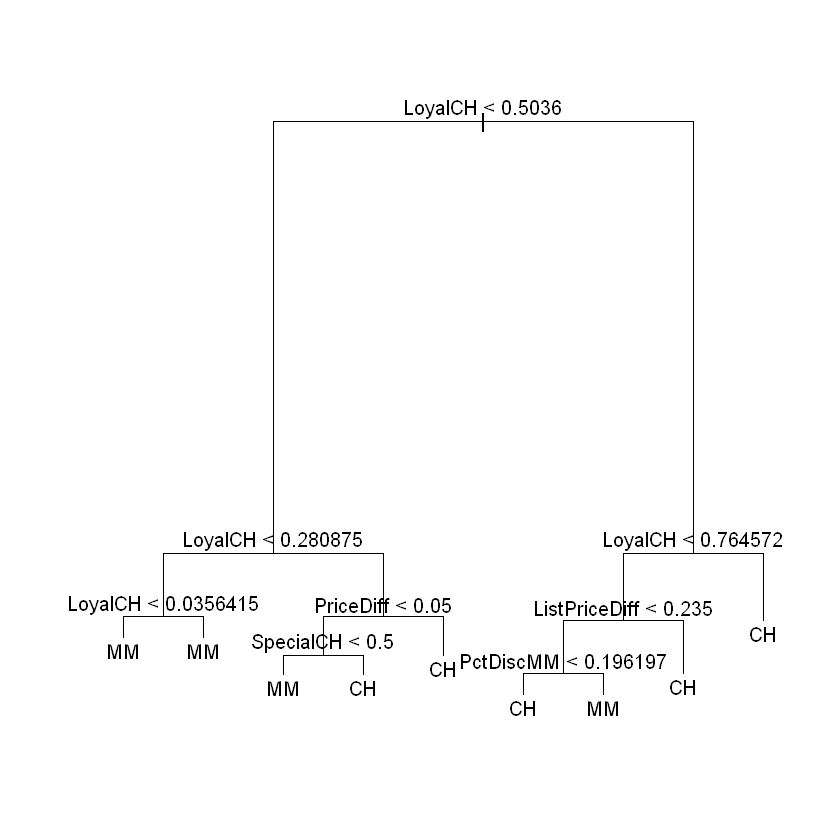

In [167]:
plot(tree.oj)
text(tree.oj, pretty = 0)

ANSWER: Tree is not too deep.

#### (e) Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?

In [168]:
tree.pred <- predict(tree.oj, OJ.test, type = "class")
table(tree.pred, OJ.test$Purchase)

         
tree.pred  CH  MM
       CH 160  38
       MM   8  64

In [169]:
1-(160+64)/(160+64+38+8)

[1] 0.1703704

#### (f) Apply the cv.tree() function to the training set in order to determine the optimal tree size.

In [170]:
cv.oj <- cv.tree(tree.oj, FUN = prune.misclass)
cv.oj

$size
[1] 9 8 7 4 2 1

$dev
[1] 150 150 149 158 172 315

$k
[1]       -Inf   0.000000   3.000000   4.333333  10.500000 151.000000

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

#### (g) Produce a plot with tree size on the x-axis and cross-validated classification error rate on the y-axis.

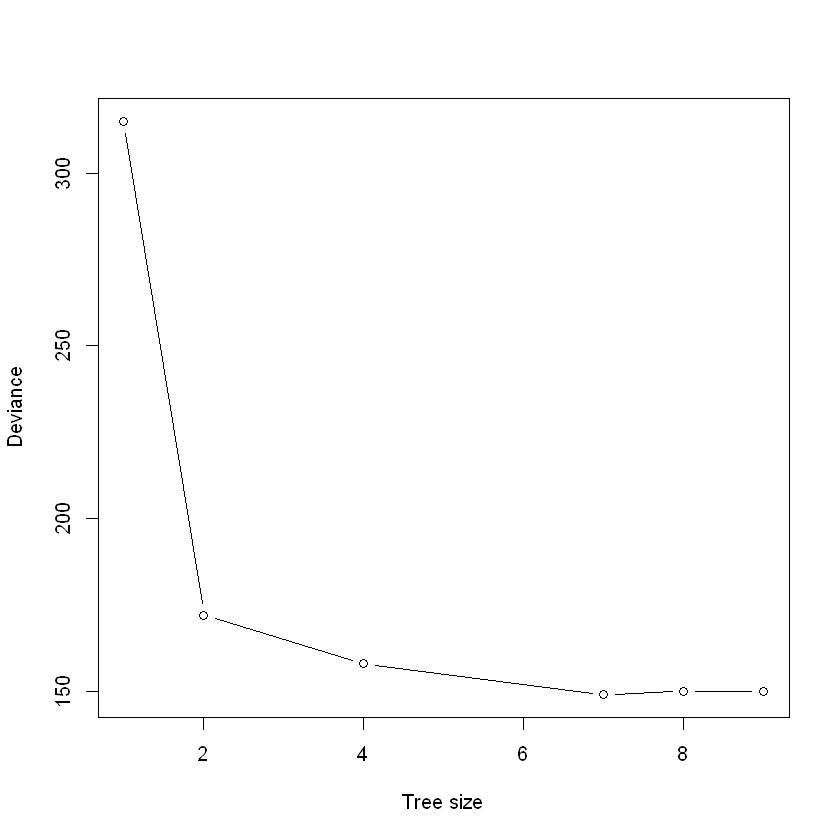

In [173]:
plot(cv.oj$size, cv.oj$dev, type = "b", xlab = "Tree size", ylab = "Deviance")

#### (h) Which tree size corresponds to the lowest cross-validated classification error rate?

We may see that the 7-node tree is the smallest tree with the lowest classification error rate.

#### (i) Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation. If cross-validation does not lead to selection of a pruned tree, then create a pruned tree with five terminal nodes.

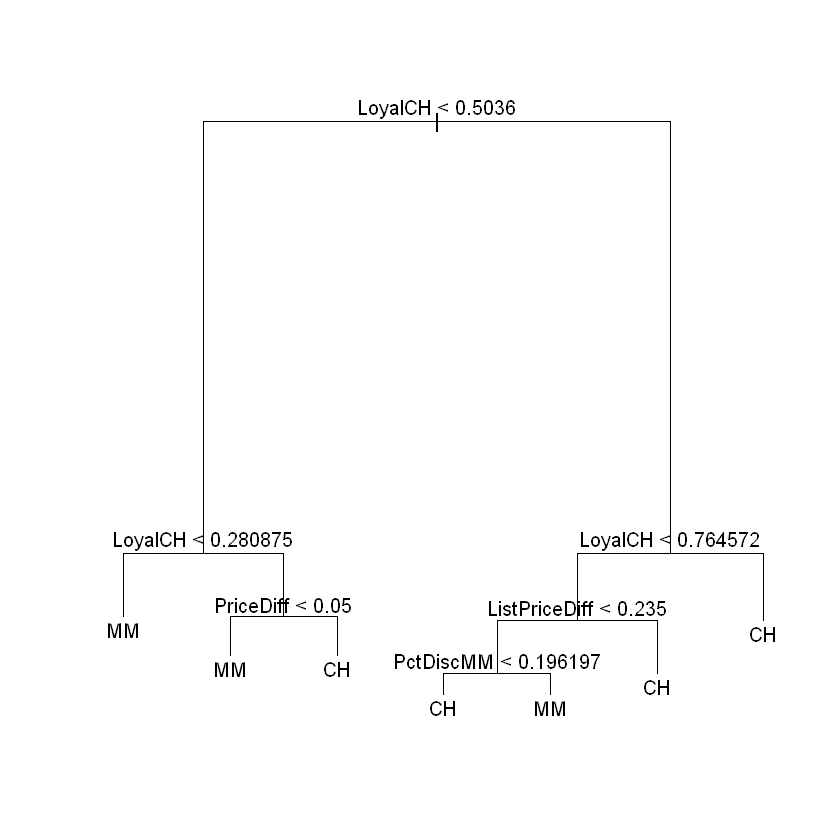

In [175]:
prune.oj <- prune.misclass(tree.oj, best = 7)
plot(prune.oj)
text(prune.oj, pretty = 0)

#### (j) Compare the training error rates between the pruned and unpruned trees. Which is higher?

In [176]:
summary(tree.oj)


Classification tree:
tree(formula = Purchase ~ ., data = OJ.train)
Variables actually used in tree construction:
[1] "LoyalCH"       "PriceDiff"     "SpecialCH"     "ListPriceDiff"
[5] "PctDiscMM"    
Number of terminal nodes:  9 
Residual mean deviance:  0.7432 = 587.8 / 791 
Misclassification error rate: 0.1588 = 127 / 800 

In [177]:
summary(prune.oj)


Classification tree:
snip.tree(tree = tree.oj, nodes = c(4L, 10L))
Variables actually used in tree construction:
[1] "LoyalCH"       "PriceDiff"     "ListPriceDiff" "PctDiscMM"    
Number of terminal nodes:  7 
Residual mean deviance:  0.7748 = 614.4 / 793 
Misclassification error rate: 0.1625 = 130 / 800 

ANSWER: Pruned tree is not doing better job becasue missclassification error is higher than regular tree.

#### (k) Compare the test error rates between the pruned and unpruned trees. Which is higher?

In [178]:
prune.pred <- predict(prune.oj, OJ.test, type = "class")
table(prune.pred, OJ.test$Purchase)

          
prune.pred  CH  MM
        CH 160  36
        MM   8  66

In [179]:
1 - (119 + 81) / (142+24+26+78)

[1] 0.2592593

ANSWER: In this example, pruned tree have higher test error rate.

## QUESTION 10

#### We now use boosting to predict Salary in the Hitters data set.

#### (a) Remove the observations for whom the salary information is unknown, and then log-transform the salaries.

In [180]:
Hitters <- na.omit(Hitters)
Hitters$Salary <- log(Hitters$Salary)

#### (b) Create a training set consisting of the first 200 observations, and a test set consisting of the remaining observations.

In [181]:
h_train <- 1:200
Hitters.train <- Hitters[h_train, ]
Hitters.test <- Hitters[-train, ]

#### (c) Perform boosting on the training set with 1,000 trees for a range of values of the shrinkage parameter λ. Produce a plot with different shrinkage values on the x-axis and the corresponding training set MSE on the y-axis.

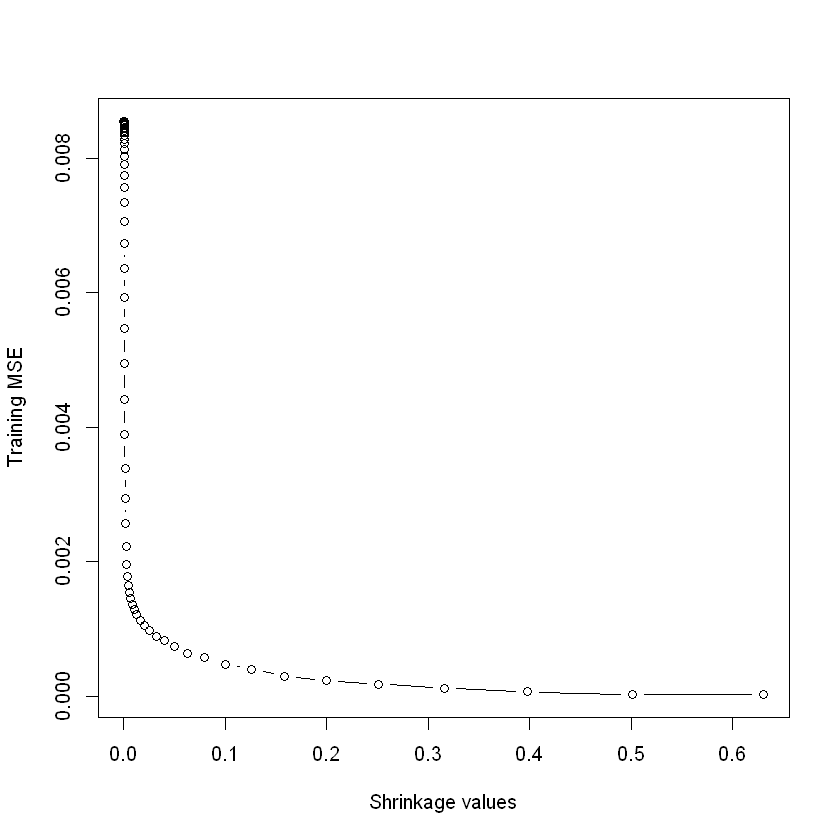

In [237]:
set.seed(1)
p <- seq(-10, -0.2, by = 0.1)
lambdas <- 10^p
train.err <- rep(NA, length(lambdas))
for (i in 1:length(lambdas)) {
    boost.hitters <- gbm(Salary ~ ., data = Hitters.train, distribution = "gaussian", n.trees = 1000, shrinkage = lambdas[i])
    pred.train <- predict(boost.hitters, Hitters.train, n.trees = 1000)
    train.err[i] <- mean((pred.train - Hitters.train$Salary)^2)
}
plot(lambdas, train.err, type = "b", xlab = "Shrinkage values", ylab = "Training MSE")

#### (d) Produce a plot with different shrinkage values on the x-axis and the corresponding test set MSE on the y-axis.

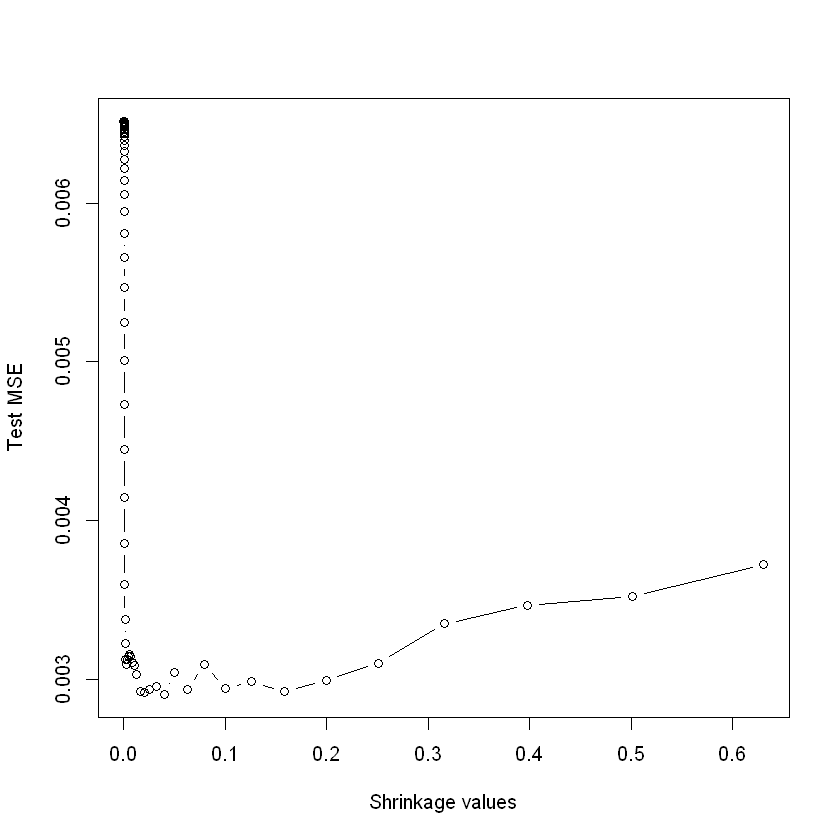

In [183]:
set.seed(1)
test.err <- rep(NA, length(lambdas))
for (i in 1:length(lambdas)) {
    boost.hitters <- gbm(Salary ~ ., data = Hitters.train, distribution = "gaussian", n.trees = 1000, shrinkage = lambdas[i])
    yhat <- predict(boost.hitters, Hitters.test, n.trees = 1000)
    test.err[i] <- mean((yhat - Hitters.test$Salary)^2)
}
plot(lambdas, test.err, type = "b", xlab = "Shrinkage values", ylab = "Test MSE")

In [184]:
min(test.err)

[1] 0.002902755

In [185]:
lambdas[which.min(test.err)]

[1] 0.03981072

ANSWER: The minimum test MSE is 0.0029, and is obtained for lambda = 0.039.

#### (e) Compare the test MSE of boosting to the test MSE that results from applying two of the regression approaches seen in Chapters 3 and 6.

In [221]:
fit1 <- lm(Salary ~ ., data = Hitters.train)
pred1 <- predict(fit1, Hitters.test)
mean((pred1 - Hitters.test$Salary)^2)

[1] 0.005039684

In [222]:
x <- model.matrix(Salary ~ ., data = Hitters.train)
x.test <- model.matrix(Salary ~ ., data = Hitters.test)
y <- Hitters.train$Salary
fit2 <- glmnet(x, y, alpha = 0)
pred2 <- predict(fit2, s = 0.01, newx = x.test)
mean((pred2 - Hitters.test$Salary)^2)

[1] 0.004676818

ANSWER: The test MSE for boosting is lower than for linear regression and ridge regression.

#### (f) Which variables appear to be the most important predictors in the boosted model?

,var,rel.inf
CAtBat,CAtBat,20.4706748
CRuns,CRuns,12.2685013
CHits,CHits,11.7912082
CRBI,CRBI,8.9865672
CWalks,CWalks,5.9375766
PutOuts,PutOuts,5.6640455
Years,Years,5.2827066
Walks,Walks,5.1349623
CHmRun,CHmRun,4.3242619
RBI,RBI,3.4594034


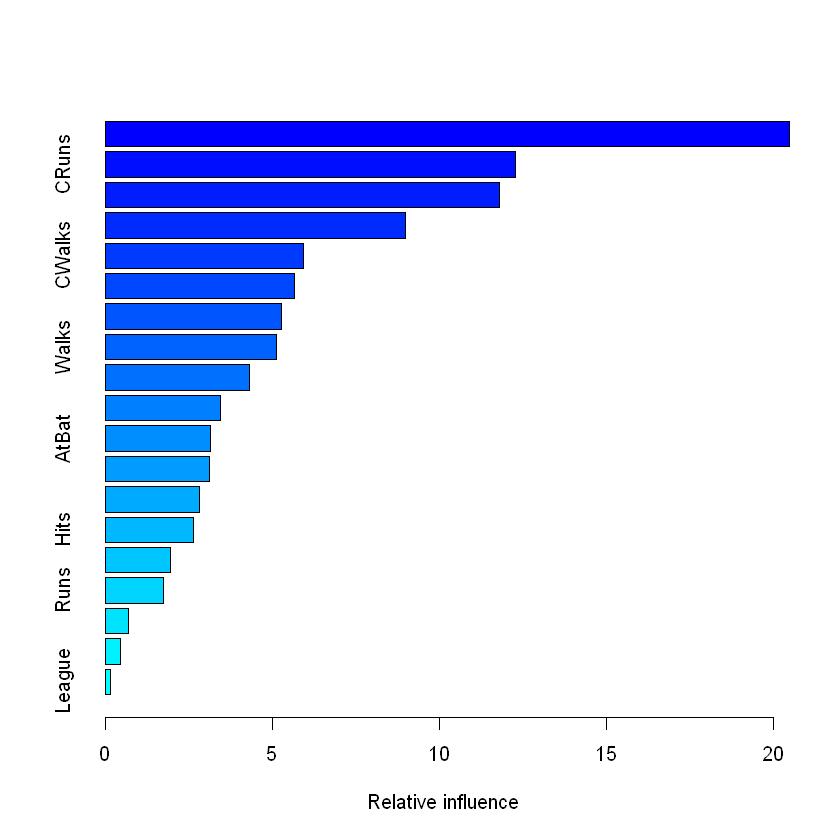

In [235]:
boost.hitters <- gbm(Salary ~ ., data = Hitters.train, distribution = "gaussian", n.trees = 1000, shrinkage = lambdas[which.min(test.err)])
summary(boost.hitters)

ANSWER: CAtBat is the most important variable.

#### (g) Now apply bagging to the training set. What is the test set MSE for this approach?

In [236]:
set.seed(1)
bag.hitters <- randomForest(Salary ~ ., data = Hitters.train, mtry = 19, ntree = 500)
yhat.bag <- predict(bag.hitters, newdata = Hitters.test)
mean((yhat.bag - Hitters.test$Salary)^2)

[1] 0.002450903